# 회귀란 무엇인가
* 회귀의 핵심: **최적의 회귀 계수**를 찾는 것.
* 분류는 예측값이 **이산형 클래스** 값이고, 회귀는 **연속형 숫자**깂이라는 게 가장 큰 차이!
* 선형 회귀가 가장 많이 사용됨.
* 선형 회귀: 실제 값과 예측 값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식 -> 규제 방법에 따라 다양한 유형으로 나뉜다.
* 선형 회귀 모델의 종류: 일반 선형 회귀, 릿지, 라쏘, 엘라스틱넷, 로지스틱 회귀

# 단순 선형 회귀를 통한 회귀 이해
* $RSS = Error^2$
* $RSS(w_0, w_1) = 1/N\sum_{i=1}^{N} (y_i-(w_0 + w_1 * x_i))^2 $
* 회귀에서 RSS는 Cost이며 w 변수로 구성되는 RSS를 비용 함수라고 한다.
* 비용 함수를 손실함수 (loss function)라고도 한다.

# 비용 최소화하기 - Gradient Descent (경사 하강법) 소개
* '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 변수값을 구하는 방식
* w_0, w_1에 대해 각각 편미분한 값을 업데이트하면서 최소 Cost가 되게 하는 값을 찾는다.

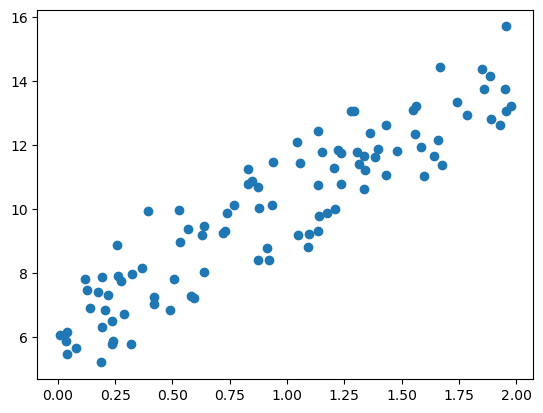

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4*X+np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [14]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [26]:
# get_weight_update() 함수
# 입력 배열 X값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0으로 구한다.
# np.dot 내적을 활용한 것!

# w1과 w0를 업데이트할 w1_update, w0_updata를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_updata, w0_updata를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    # w1과 w0을 업데이트할 w1_updata와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [32]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1를 모두 0으로 초기화.
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    return w1, w0

In [36]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


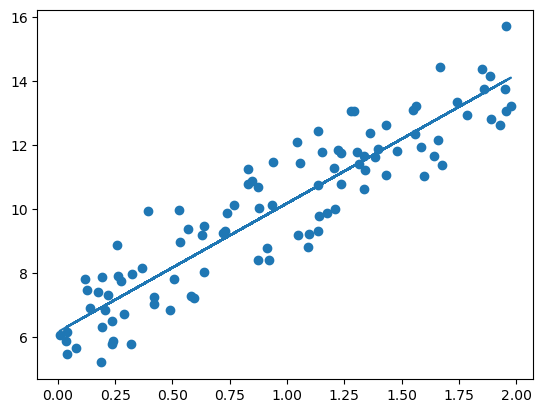

In [38]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [46]:
# 미니 배치 확률적 경사 하강법 구현: 시간 단축
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    return w1, w0
    

In [44]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0: ", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print("Stochastic Gradient Descent Total Cost: {0:.4f}".format(get_cost(y, y_pred)))

w1: 4.028 w0:  6.156
Stochastic Gradient Descent Total Cost: 0.9937


# 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [11]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

SyntaxError: invalid syntax (263906781.py, line 1)

## 다중공선성(multi-collinearity) 문제
: 피처 간의 상관관계가 너무 높아 분산이 매우 커져서 오류에 민감해지는 문제.
* 상간관게가 높은 피처가 많은 경우 -> 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용

## 회귀 평가 지표
### 1) MAE
* Mean Absolute Error
* 실제 값과 예측값의 차를 절댓값으로 변환해 평균한 것
* $MAE = 1/n\sum_{i=1}^{n} |Yi-Y'i|$
### 2) MSE
* Mean Squared Error
* 실제 값과 예측값 차를 제곱해 평균한 것
* $MSE = 1/n\sum_{i=1}^{n} (Yi-Y'i)^2$
### 3) RMSE
* MSE에 루트를 씌운 것
### 4) $R^2$
* 분산 기반으로 예측 성능 평가
* 1에 가까울수록 예측 정확도가 높다.
* $R^2 = (예측값 Variance)/(실제값 Variance)$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# boston 데이터 세트 
diabetes = load_diabetes()
diabetesDF = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetesDF['sick'] = diabetes.target
print("데이터 크기", diabetesDF.shape)
diabetesDF.head()

데이터 크기 (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sick
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [31]:
print(diabetesDF['sick'].describe())

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: sick, dtype: float64


IndexError: index 2 is out of bounds for axis 0 with size 2

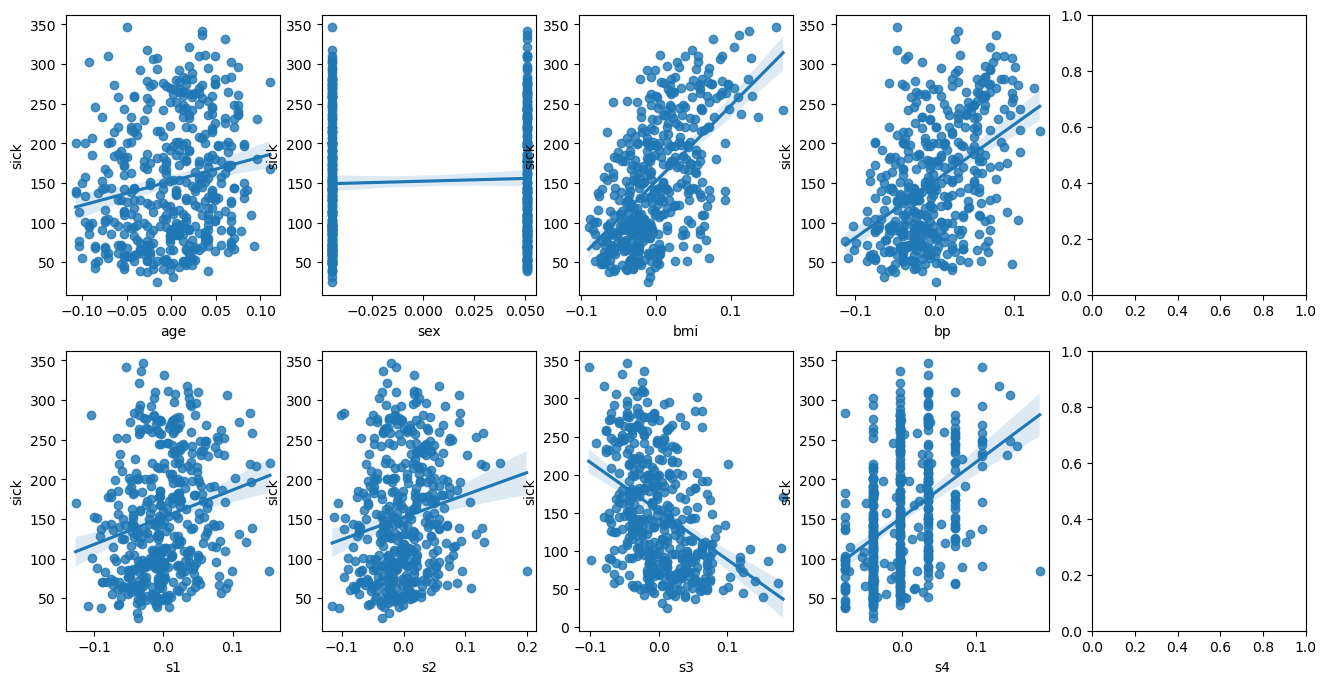

In [23]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=5, nrows=2)
lm_features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='sick', data=diabetesDF, ax=axs[row][col])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = diabetesDF['sick']
X_data = diabetesDF.drop(['sick'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)
# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 2993.705, RMSE: 54.715
Variance score: 0.497


In [35]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 152.38617209733573
회귀 계수값: [   39.1  -251.9   468.8   305.3 -1146.9   788.    177.2   117.4   937.9
    53.7]


In [37]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

s5      937.9
s2      788.0
bmi     468.8
bp      305.3
s3      177.2
s4      117.4
s6       53.7
age      39.1
sex    -251.9
s1    -1146.9
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = 

# 다항 회귀와 과적합 이해
* 다항 회귀도 선형 회귀이다!
* 사이킷런의 PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print("일차 단항식 계수 피처:\n", X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처:\n", poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [11]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0]+3*X[:, 0]**2 + 4*X[:, 1]**3
    return y
X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 feature: \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값:\n",y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [17]:
from sklearn.linear_model import LinearRegression
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("3차 다항식 계수 feature: \n", poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape: ', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape:  (10,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipleline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)